In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gujarat-biomass-production/Distance_Matrix.csv
/kaggle/input/gujarat-biomass-production/Biomass_History.csv


In [2]:
import geopandas as gpd

In [4]:
biomass=pd.read_csv('/kaggle/input/gujarat-biomass-production/Biomass_History.csv')
biomass.head()

,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


In [5]:
distance=pd.read_csv('/kaggle/input/gujarat-biomass-production/Distance_Matrix.csv',index_col=0)
distance.head()

,0,1,2,3,4,5,6,7,8,9,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280


In [24]:
dist=distance.values

In [4]:
biomass.sum()

Index        2.922153e+06
Latitude     5.442081e+04
Longitude    1.736758e+05
2010         3.491626e+05
2011         3.647801e+05
2012         2.646958e+05
2013         3.914414e+05
2014         3.819328e+05
2015         3.213489e+05
2016         2.734500e+05
2017         3.848570e+05
dtype: float64

In [40]:
biomass.mean()

Index        1208.500000
Latitude       22.506537
Longitude      71.826215
2010          144.401424
2011          150.860247
2012          109.468899
2013          161.886430
2014          157.954024
2015          132.898633
2016          113.089323
2017          159.163367
dtype: float64

In [15]:
(distance.values-distance.values.T).max()

86.41309999999999

In [4]:
biomap = gpd.GeoDataFrame(biomass, geometry=gpd.points_from_xy(biomass.Longitude,biomass.Latitude))

# Set the coordinate reference system (CRS) to EPSG 4326
biomap.crs = {'init': 'epsg:4326'}

# View the first five rows of the GeoDataFrame
biomap.head()

/opt/conda/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,Index,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,geometry
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296,POINT (71.33144 24.66818)
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945,POINT (71.41106 24.66818)
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232,POINT (71.49069 24.66818)
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352,POINT (71.57031 24.66818)
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885,POINT (71.64994 24.66818)


In [5]:
# Create a map
ax = regions.plot(figsize=(8,8), color='whitesmoke', linestyle=':', edgecolor='black')
biomap.to_crs(epsg=32630).plot(markersize=1, ax=ax)

NameError: name 'regions' is not defined

In [9]:
import plotly.express as px

# color_scale = [(0, 'orange'), (1,'red')]

fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color="2010",
#                         color_continuous_scale=color_scale,
#                         size="2010",
                        zoom=8, 
                        height=800,
                        width=800)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [5]:
import plotly.express as px

# px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color="2010",
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_traces(cluster=dict(enabled=True))
fig.show()

In [22]:
import plotly.express as px

# px.set_mapbox_access_token(open(".mapbox_token").read())
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2017"],
                        color="2017",
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
# fig.update_traces(cluster=dict(enabled=True))
fig.show()

In [31]:
dist[1247][904]

525.0033000000001

In [22]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(biomass[['Latitude','Longitude']],sample_weight=biomass['2010'])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [41]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(biomass[['Latitude','Longitude','2010']])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [34]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()
x=ss.fit_transform(biomass[['Latitude','Longitude']])
dist_transform=ss.fit_transform(dist)
w=ss.fit_transform(biomass['2010'].values.reshape(-1, 1))
w=w.flatten()

In [20]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(x,sample_weight=biomass['2010'])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [21]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(ss.fit_transform(biomass[['Latitude','Longitude','2010']]))
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [44]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=0.08)
y=model.fit_predict(biomass[['Latitude','Longitude','2010']])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [45]:
from sklearn.cluster import DBSCAN

model=DBSCAN(eps=13.5,metric='precomputed',min_samples=200)
y=model.fit_predict(distance,sample_weight=biomass['2010'])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [49]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(distance,sample_weight=biomass['2010'])
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [38]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5,verbose=1)
y=model.fit_predict(dist_transform,sample_weight=w)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



Initialization complete
Iteration 0, inertia -188406.55583580275.
Iteration 1, inertia -3899882.5618382767.
Iteration 2, inertia -6318720.4233668195.
Iteration 3, inertia -6318720.42336682.
Iteration 4, inertia -6318720.42336682.
Iteration 5, inertia -6318720.42336682.
Iteration 6, inertia -6318720.42336682.
Iteration 7, inertia -6318720.4233668195.
Iteration 8, inertia -6318720.4233668195.
Iteration 9, inertia -6318720.4233668195.
Iteration 10, inertia -6318720.4233668195.
Iteration 11, inertia -6318720.4233668195.
Iteration 12, inertia -6318720.4233668195.
Iteration 13, inertia -6318720.42336682.
Iteration 14, inertia -6318720.4233668195.
Iteration 15, inertia -6318720.4233668195.
Iteration 16, inertia -6318720.42336682.
Iteration 17, inertia -6318720.4233668195.
Iteration 18, inertia -6318720.42336682.
Iteration 19, inertia -6318720.42336682.
Iteration 20, inertia -6318720.4233668195.
Iteration 21, inertia -6318720.42336682.
Iteration 22, inertia -6318720.4233668195.
Iteration 23, i

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1033: ConvergenceWarning:

Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.



In [61]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
dist_transform=ms.fit_transform(distance)
wt=ms.fit_transform(biomass['2010'].values.reshape(-1, 1))
wt=wt.flatten()

<Axes: ylabel='Count'>

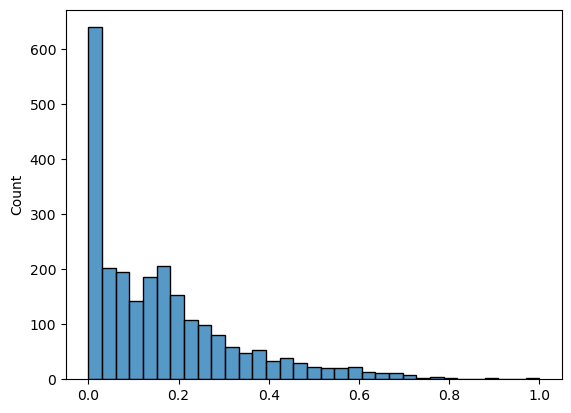

In [62]:
import seaborn as sns 
sns.histplot(wt)

In [63]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=5)
y=model.fit_predict(dist_transform,sample_weight=wt)
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [59]:
from sklearn.cluster import AffinityPropagation

model=AffinityPropagation(damping=0.5,affinity='precomputed',preference=biomass['2010'])
y=model.fit_predict(distance)
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [67]:
from sklearn.cluster import AgglomerativeClustering

model=AgglomerativeClustering(n_clusters=,metric='precomputed',linkage='average')
y=model.fit_predict(distance)
fig = px.scatter_mapbox(biomass, 
                        lat="Latitude", 
                        lon="Longitude", 
                        hover_name="Index", 
                        hover_data=["Index", "2010"],
                        color=y,
                        zoom=5, 
                        height=400,
                        width=600)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()